### What's the weather like as we approach the equator?
* From the analysis of almost 500 cities across world we can see the trend as Latitude moves closer to Equator Temperature increases.
* Cloudiness remains unaffected of closeness of Equator.
* Wind Speed increases as we move far from Equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key
#city = 'Atlanta'
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q=" 
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + '106c3412a5d8a7cd463adc77a93c984c' +"&q="
cityName = []
cityID = []
theCountry = []
latitude = []
longitude = []
temperatureMax = []
cloudiness = []
windSpeed = []
humidity =[]
theDate =[]

for city in cities:
    try:
        response=requests.get(url+city).json()
        print(response['name'] + ' id:' + str(response['id']))
        cityName.append(response['name']) #name
        cityID.append(response['id']) #city id
        theCountry.append(response['sys']['country']) #country
        latitude.append(response['coord']['lat']) #lat
        longitude.append(response['coord']['lon']) #long
        temperatureMax.append(response['main']['temp_max']) #tmax
        cloudiness.append(response['clouds']['all']) #cloud %
        windSpeed.append(response['wind']['speed']) #ws
        humidity.append(response['main']['humidity']) #hum
        theDate.append(response['dt']) #the utc dt
    except KeyError:
        print('Bad Data cant work with it')



    
    
    
   # response = requests.get(url + city).json()
   # print(response['name'] + ' id:' + str(response['id']))
#     lat.append(response['coord']['coord.lat'])
#     temp.append(response['main']['temp'])

#settings = {"units": "metric", "appid": api_key}
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + 'apikey' +"&q=" + 'Atlanta'
#response = requests.get(url).json()
#print(response)
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

Bilma id:2446796
Rawson id:3839307
Komsomolskiy id:1486910
Busselton id:2075265
Upernavik id:3418910
Rikitea id:4030556
Bad Data cant work with it
Sitka id:4267710
Aklavik id:5882953
Gibara id:3558315
Bethel id:5880568
Hermanus id:3366880
Vaini id:1273574
Dikson id:1507390
Victoria id:1733782
Ushuaia id:3833367
Fairbanks id:5861897
Elko id:5703670
East London id:1006984
Lavumisa id:935051
Mayumba id:2399001
Baghdad id:98182
Puerto Escondido id:3520994
Saint Lawrence id:2562619
Richards Bay id:962367
Vilyuysk id:2013392
Arraial do Cabo id:3471451
Ribeira Grande id:3372707
Kapaa id:5848280
Thompson id:6165406
Ocos id:3592086
Bad Data cant work with it
Rincon id:4218882
Mataura id:6201424
Inhambupe id:3461224
Atuona id:4020109
Bad Data cant work with it
Port Elizabeth id:4501427
Punta Arenas id:3874787
Goure id:2444219
Hilo id:5855927
Tuktoyaktuk id:6170031
Verkhnyaya Inta id:1487332
Bad Data cant work with it
Colares id:2269142
Mahibadhoo id:1337605
Isangel id:2136825
Port Lincoln id:206

Arys id:1526168
San Patricio id:3437029
Nikolayevka id:484907
Sainte-Anne-des-Monts id:6137749
Tamandare id:3661980
Portland id:5746545
Luderitz id:3355672
Bad Data cant work with it
Nantucket id:4944903
Basse-Pointe id:3571097
Suez id:359796
Bad Data cant work with it
Cobourg id:5924579
Tab id:3044221
Lujiang id:1802068
Narsaq id:3421719
Urucui id:3385658
Castro id:3896218
Lerwick id:2644605
Port Hardy id:6111862
Ordynskoye id:1496100
Coquimbo id:3893629
Gavrilovka Vtoraya id:561804
Ostersund id:2685750
Hervey Bay id:2146219
Santa Fe id:3836277
Xuanhua id:2033574
Ruidoso id:5488598
Kindia id:2419533
Krasnoarmeysk id:542463
Anadyr id:2127202
Zeya id:2012593
Ust-Omchug id:2120047
Bilecik id:750598
Ayutla id:4017924
Zhigansk id:2012530
Prince Albert id:6113335
Bad Data cant work with it
Bad Data cant work with it
Yar-Sale id:1486321
Sur id:286245
Eureka id:5563397
Florianopolis id:3463237
Jiangyou id:1885823
Satipo id:3928924
Carballo id:3126369
Bingol id:321082
Katsina id:2334802
Tacuar

In [4]:
#len(cityName)
weather_dict = {
    "City": cityName,
    "Latitude": latitude,
    "Temperature": temperatureMax,
    "Wind Speed" : windSpeed,
    "Humidity" : humidity,
    "Cloudiness" :cloudiness
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Temperature,Wind Speed,Humidity,Cloudiness
0,Bilma,18.69,75.50,5.84,24,0
1,Rawson,-43.30,70.91,21.16,21,92
2,Komsomolskiy,67.55,34.82,20.49,94,88
3,Busselton,-33.64,57.23,4.72,100,0
4,Upernavik,72.79,23.21,11.10,100,64


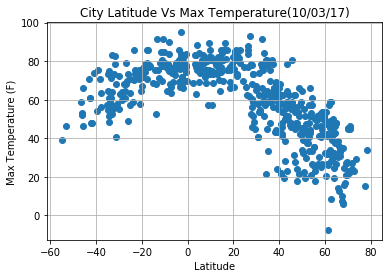

In [8]:
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")
plt.title("City Latitude Vs Max Temperature(10/03/17)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

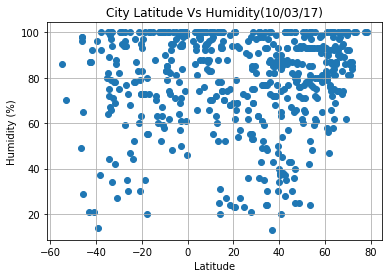

In [10]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")
plt.title("City Latitude Vs Humidity(10/03/17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

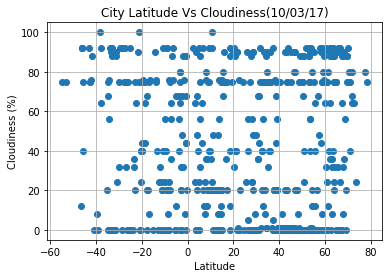

In [11]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")
plt.title("City Latitude Vs Cloudiness(10/03/17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

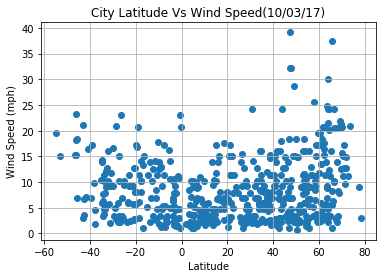

In [13]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")
plt.title("City Latitude Vs Wind Speed(10/03/17)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)